<a href="https://colab.research.google.com/github/Redwolf0023/AutoMLvsBayesian/blob/main/Google_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and install the dependencies
!sudo apt-get install swig -y
!pip install Cython numpy
!pip install scikit-learn
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
swig is already the newest version (4.0.2-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
openjdk version "11.0.20" 2023-07-18
OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from h2o.estimators import H2OTargetEncoderEstimator

In [ ]:
# initialise the cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,31 mins 50 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_dj9x5a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# import the input files as train and test datasets seperately as h2oframe
train_df = h2o.import_file('Google_Stock_Train (2010-2022).csv')
test_df = h2o.import_file('Google_Stock_Test (2023).csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train_df.head()

Date,Open,High,Low,Close,Adj Close,Volume
2010-01-04 00:00:00,15.6894,15.7535,15.6216,15.6844,15.6844,7.81698e+07
2010-01-05 00:00:00,15.6952,15.7117,15.5541,15.6154,15.6154,1.20068e+08
2010-01-06 00:00:00,15.6622,15.6622,15.1742,15.2217,15.2217,1.58989e+08
2010-01-07 00:00:00,15.2502,15.2653,14.8311,14.8674,14.8674,2.56315e+08
2010-01-08 00:00:00,14.8148,15.0963,14.7425,15.0656,15.0656,1.88783e+08
2010-01-11 00:00:00,15.1266,15.1266,14.8659,15.0428,15.0428,2.88227e+08
2010-01-12 00:00:00,14.9562,14.969,14.7147,14.7768,14.7768,1.93938e+08
2010-01-13 00:00:00,14.4267,14.7242,14.3619,14.6919,14.6919,2.59604e+08
2010-01-14 00:00:00,14.6121,14.8699,14.5848,14.761,14.761,1.69434e+08
2010-01-15 00:00:00,14.8483,14.8539,14.4655,14.5145,14.5145,2.17163e+08


In [ ]:
predictors = train_df.columns[:2] + train_df.columns[3:]
response = 'High'

In [ ]:
predictors

['Date', 'Open', 'Low', 'Close', 'Adj Close', 'Volume']

In [ ]:
# Initialize H2O AutoML
aml = H2OAutoML(max_models=10, seed=42)

# Train the AutoML model
aml.train(x=predictors, y=response, training_frame=train_df)

# View the AutoML leaderboard
lb = aml.leaderboard
print(lb)

# Make predictions on the test set using the best model
best_model = aml.leader
predictions = best_model.predict(test_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse       mse       mae       rmsle    mean_residual_deviance
GBM_4_AutoML_1_20230825_162126                           0.369341  0.136413  0.197247  0.00509874                  0.136413
StackedEnsemble_AllModels_1_AutoML_1_20230825_162126     0.374113  0.139961  0.204642  0.0054461                   0.139961
GBM_3_AutoML_1_20230825_162126                           0.375107  0.140705  0.202096  0.00528938                  0.140705
GBM_2_AutoML_1_20230825_162126                           0.375382  0.140912  0.205486  0.0053874                   0.140912
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_162126  0.382522  0.146323  0.216932  0.00610614                  0.146323
GLM_1_AutoML_1_20230825_162126                           0.4559    0.207845  0.286789  0.00983088                  0.207845
XGBoost_3_AutoML_1_20230825_162126   

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_162126,0.75745,0.573731,0.597367,0.0070342,0.573731,2632,0.298532,StackedEnsemble
GBM_4_AutoML_1_20230825_162126,0.76652,0.587553,0.614789,0.00701414,0.587553,877,0.127209,GBM
GLM_1_AutoML_1_20230825_162126,0.768146,0.590048,0.561359,0.00688823,0.590048,64,0.003614,GLM
StackedEnsemble_AllModels_1_AutoML_1_20230825_162126,0.769565,0.592231,0.601954,0.00706682,0.592231,3743,0.842454,StackedEnsemble
GBM_3_AutoML_1_20230825_162126,0.777367,0.6043,0.598333,0.00710058,0.6043,863,0.048478,GBM
GBM_2_AutoML_1_20230825_162126,0.81171,0.658873,0.612382,0.00738725,0.658873,710,0.090539,GBM
GBM_1_AutoML_1_20230825_162126,1.14345,1.30749,0.856048,0.0102693,1.30749,2596,0.174493,GBM
XGBoost_3_AutoML_1_20230825_162126,1.39379,1.94264,1.05118,0.0129978,1.94264,1161,0.025505,XGBoost
XGBoost_1_AutoML_1_20230825_162126,1.47564,2.17751,1.11825,0.0127326,2.17751,12380,0.119894,XGBoost
XGBoost_2_AutoML_1_20230825_162126,1.58628,2.51629,1.25987,0.01414,2.51629,4839,0.032107,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

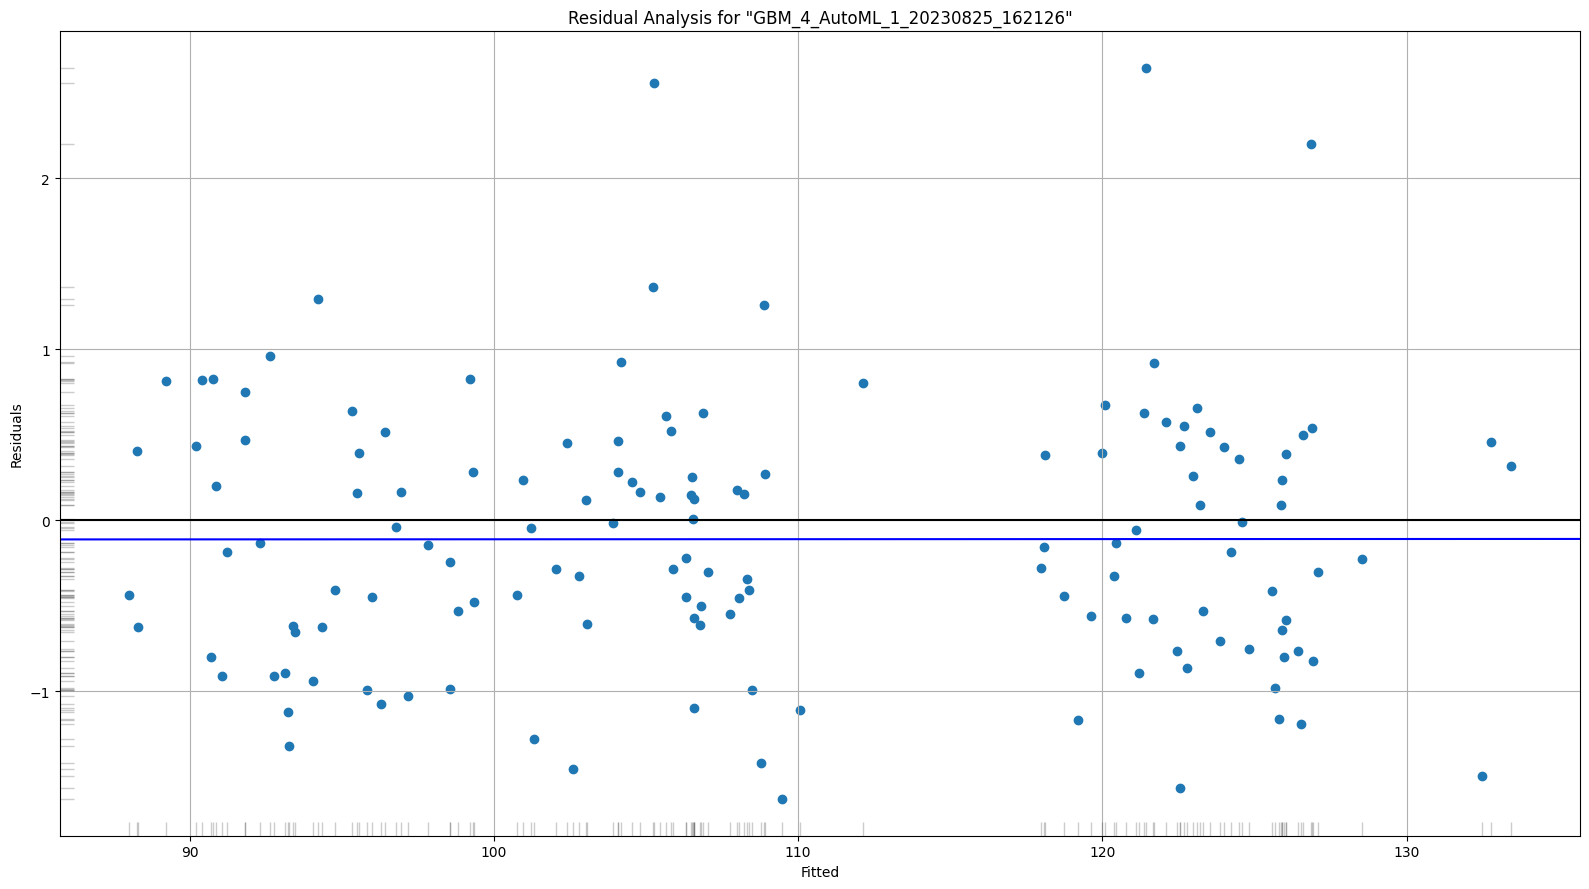

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

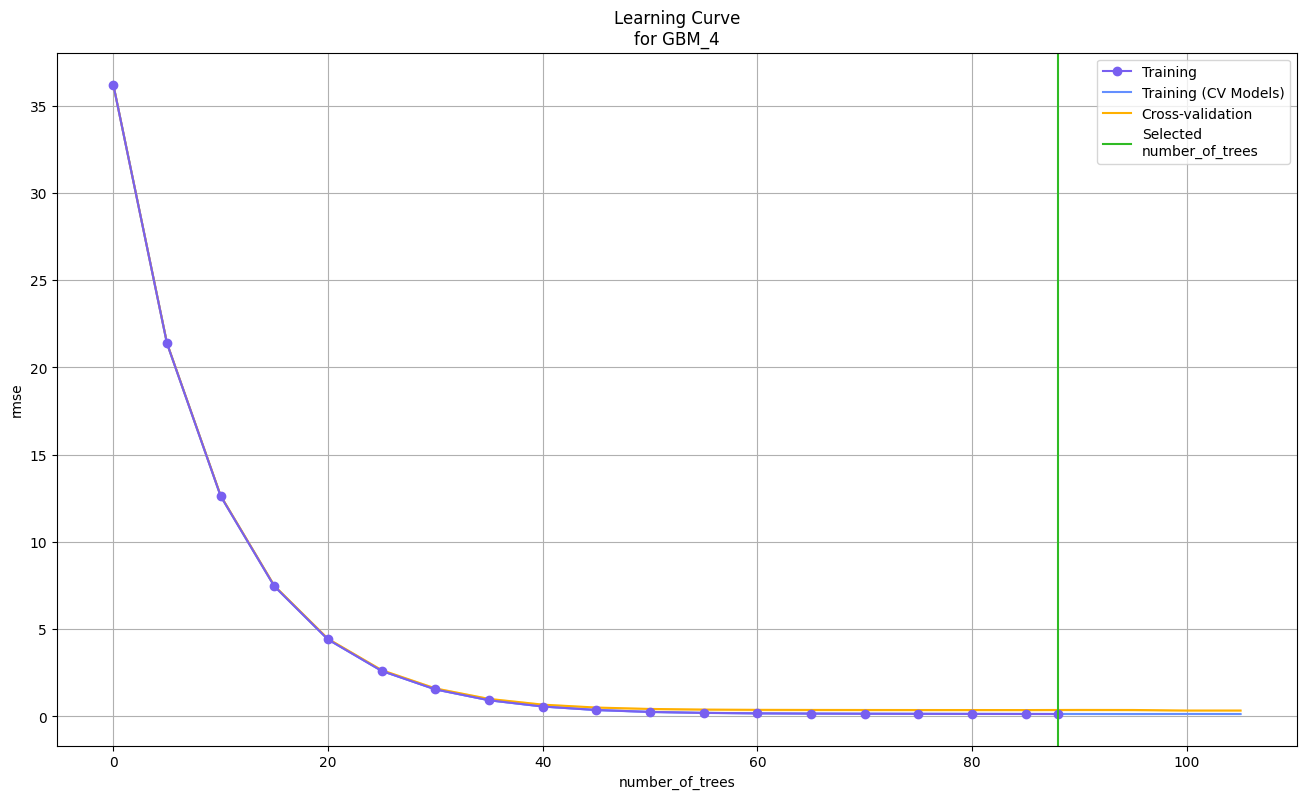

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

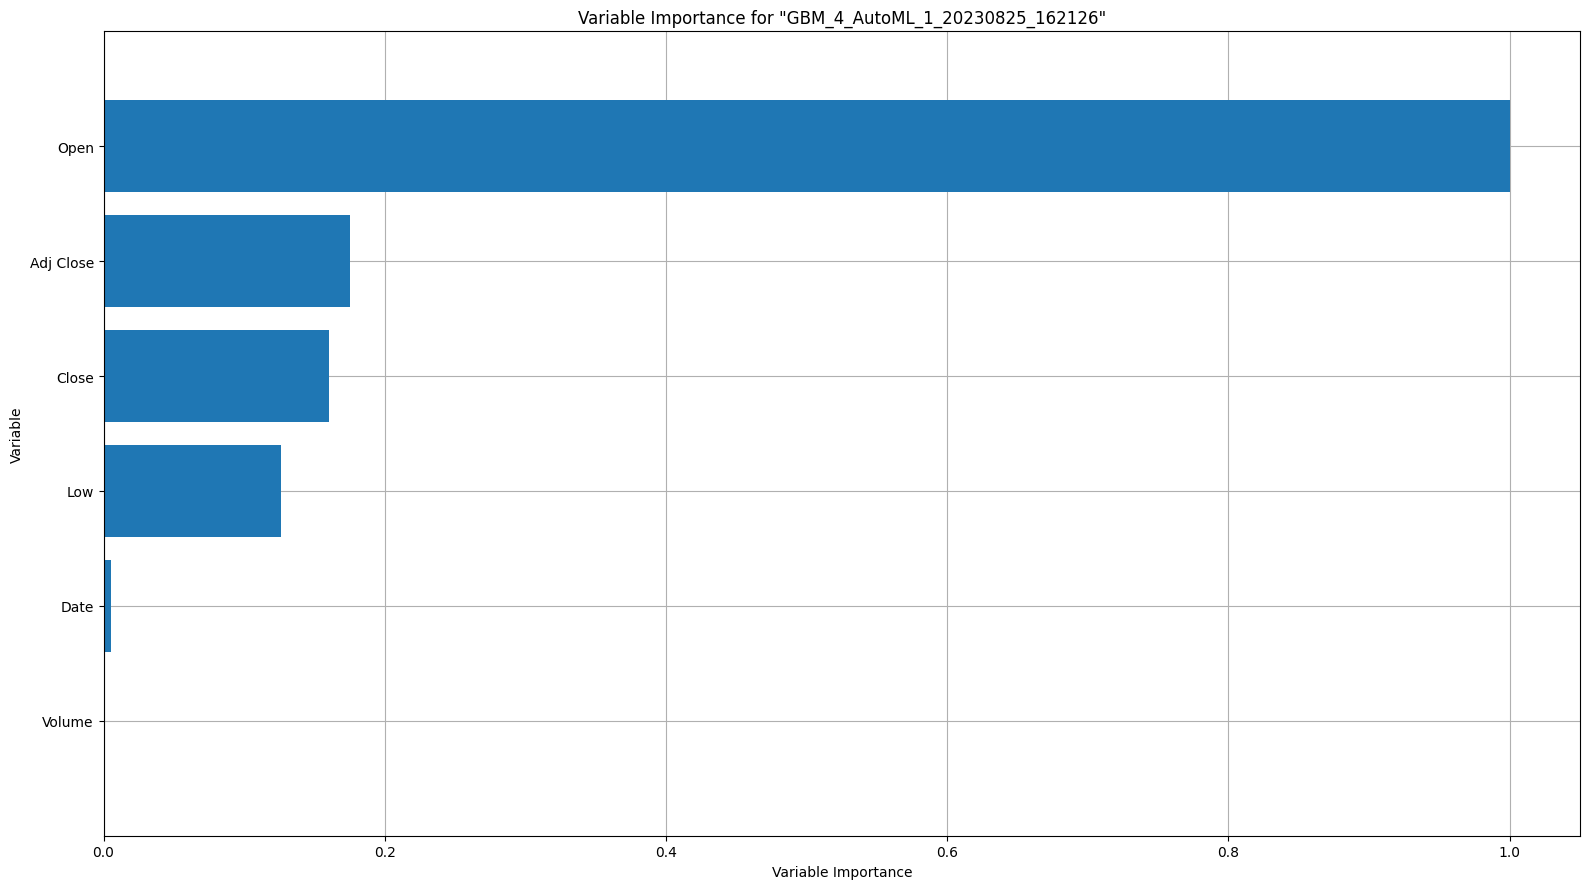

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

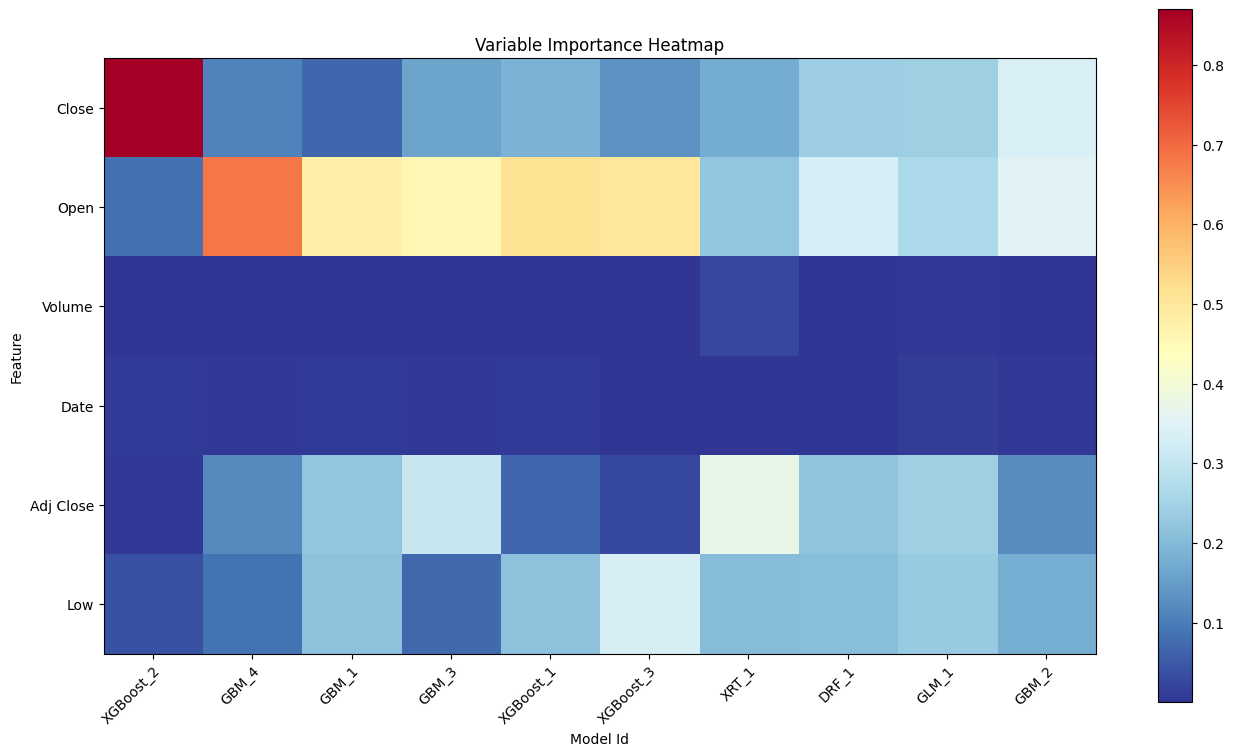

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

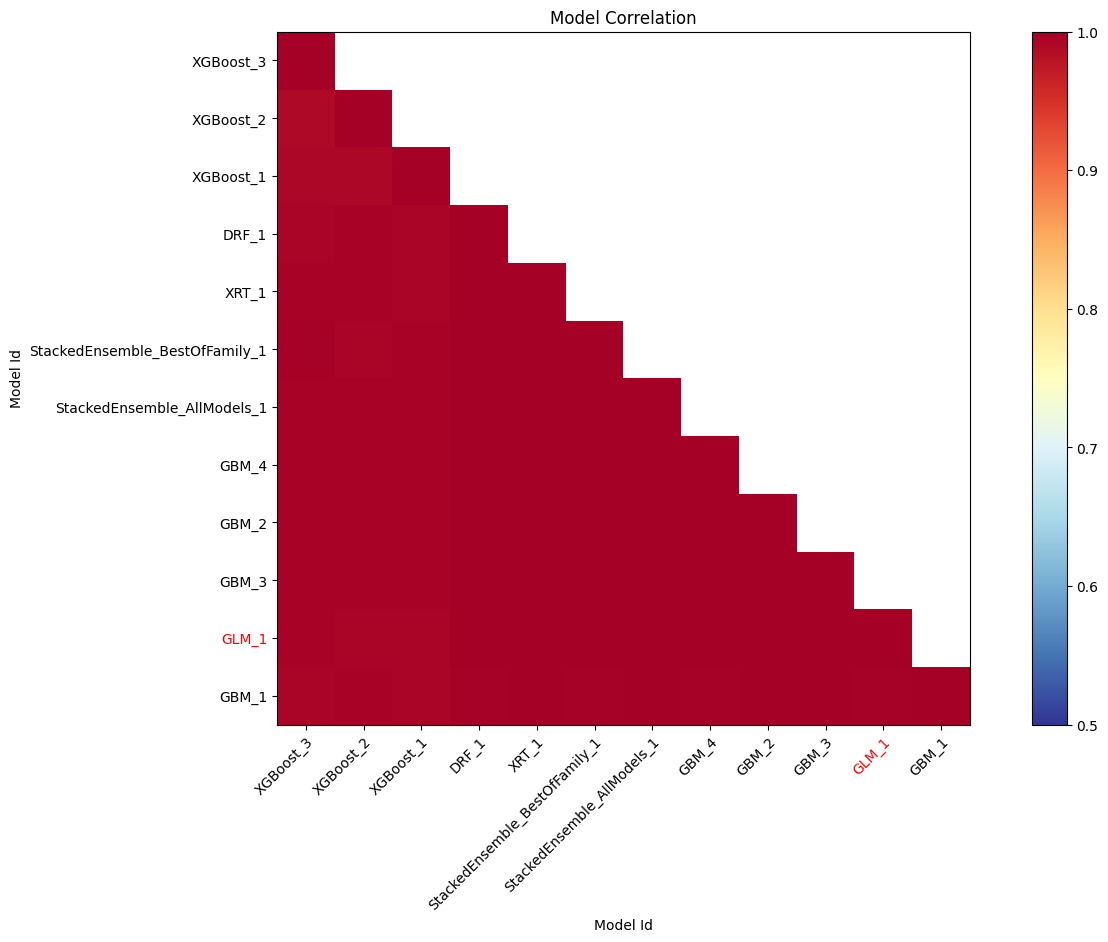

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

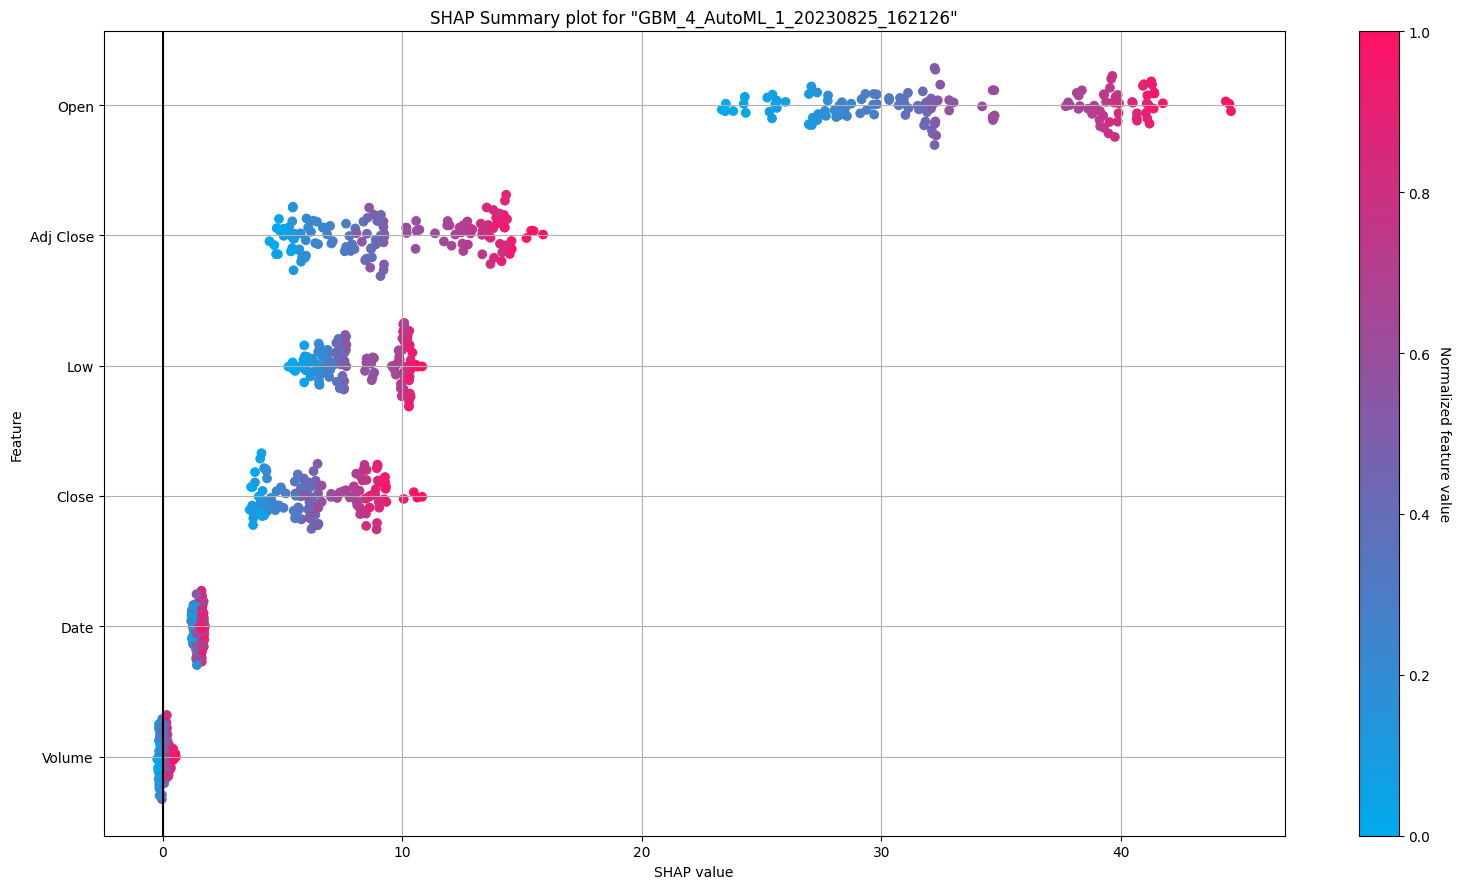

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

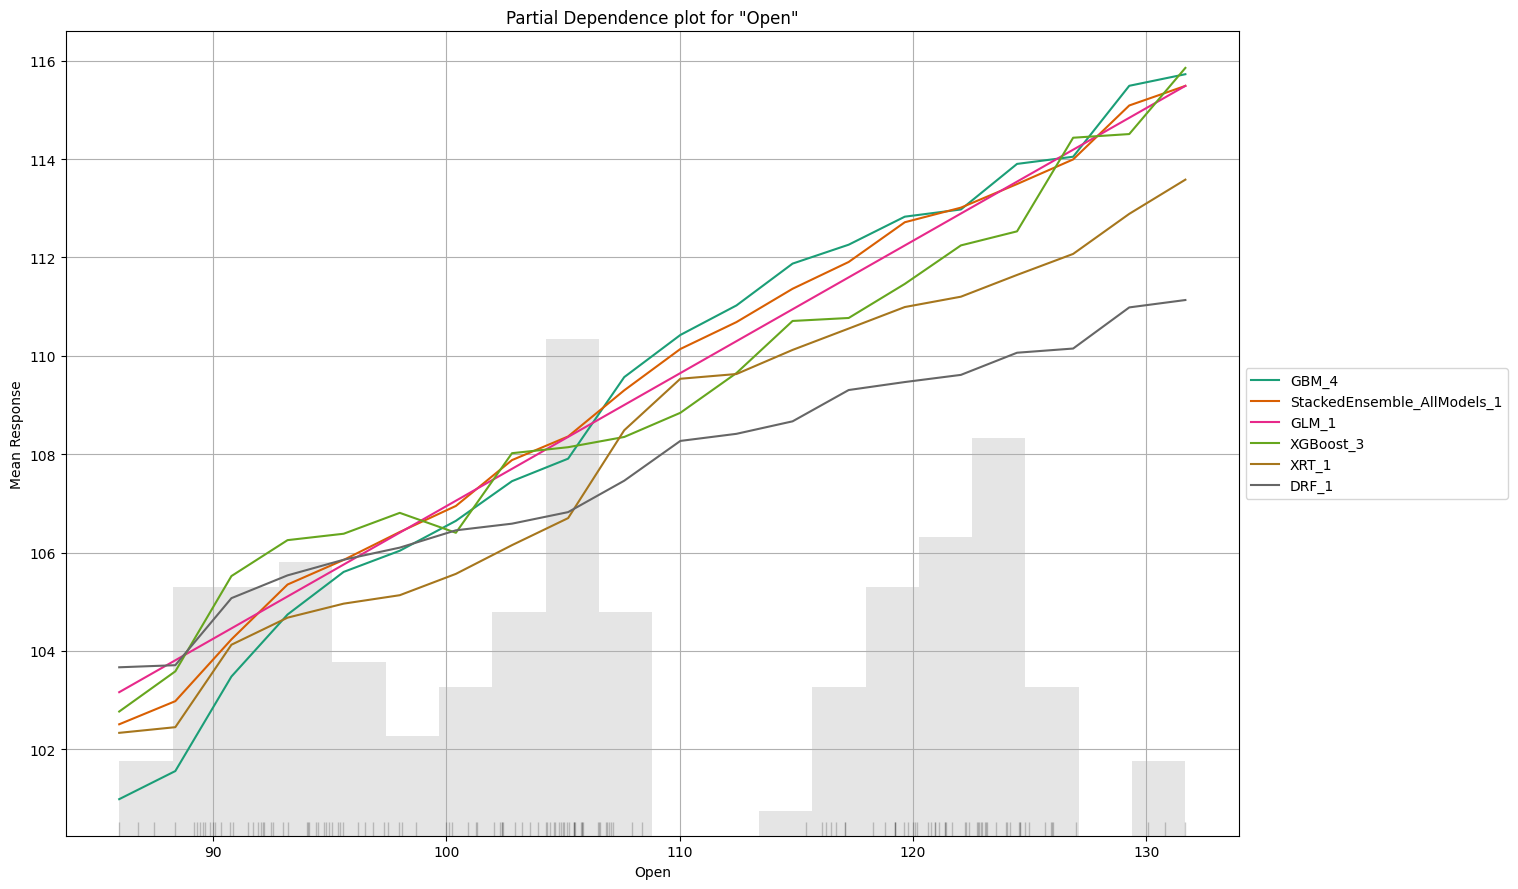

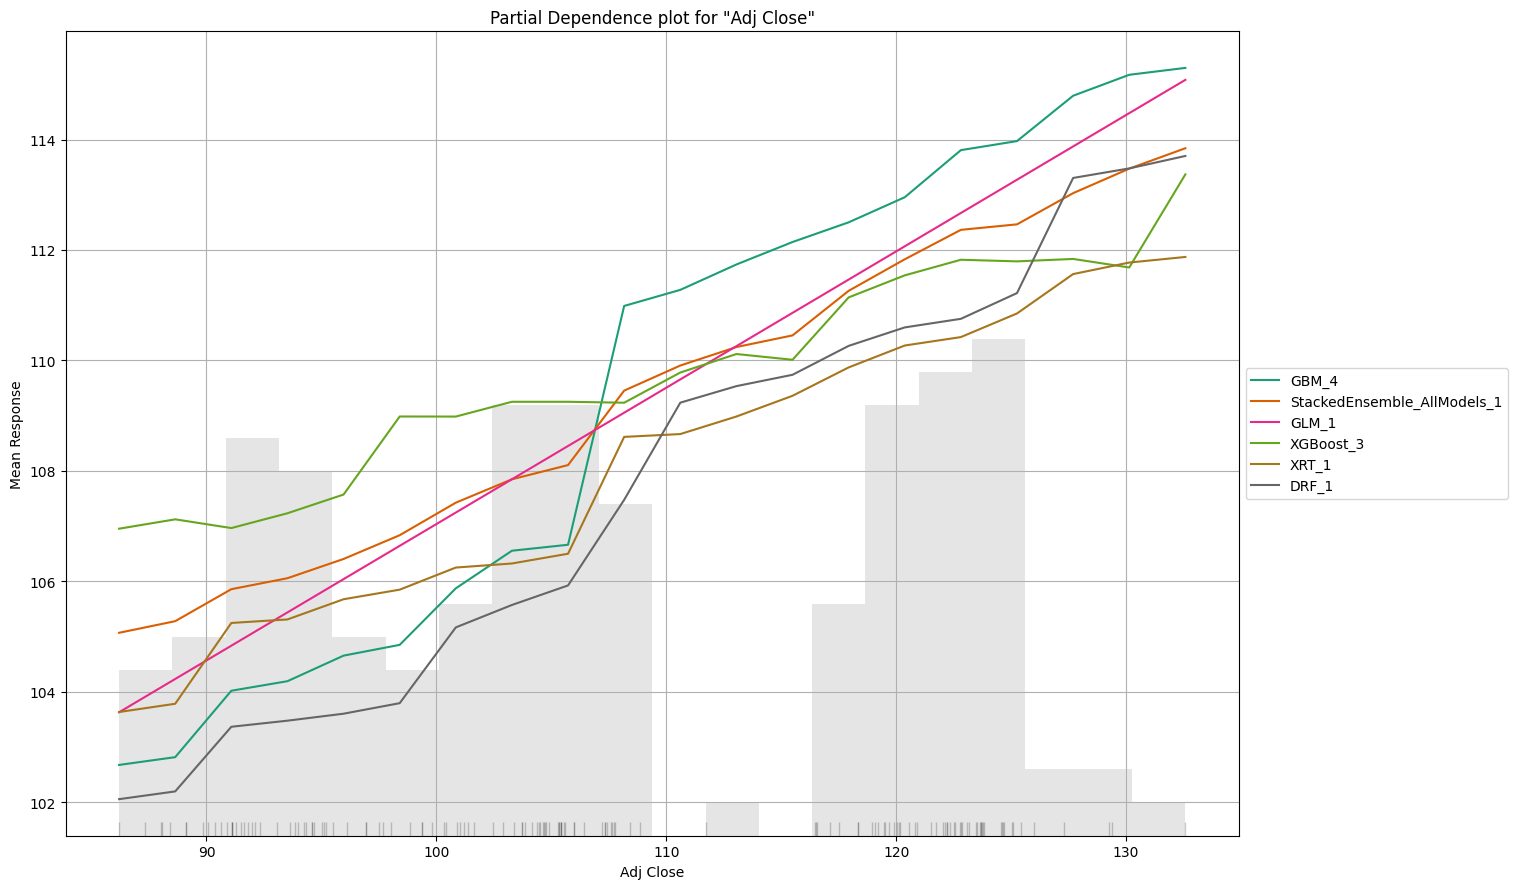

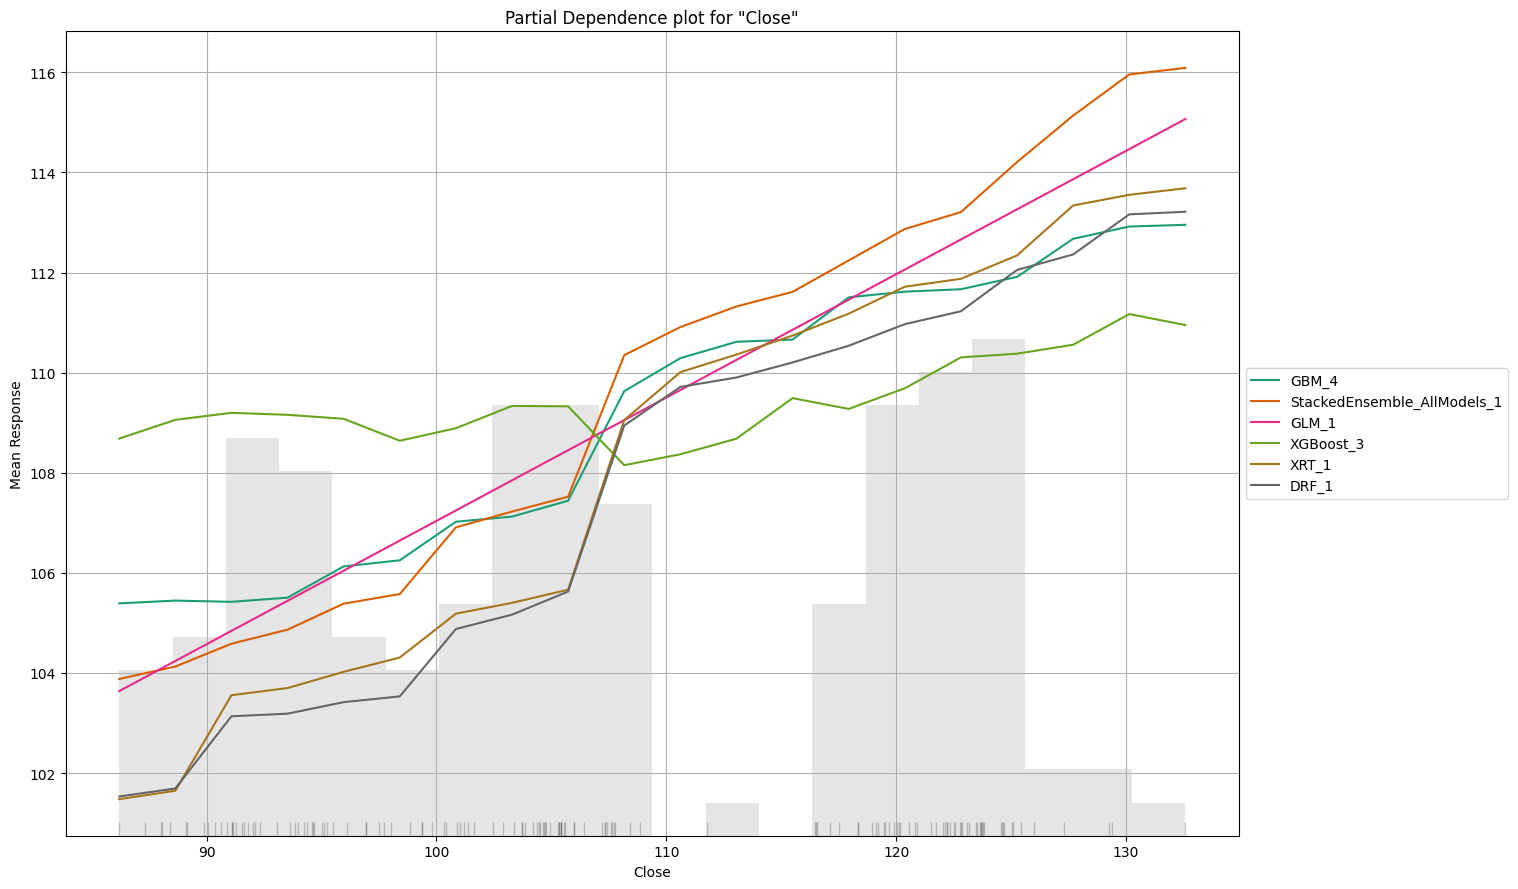

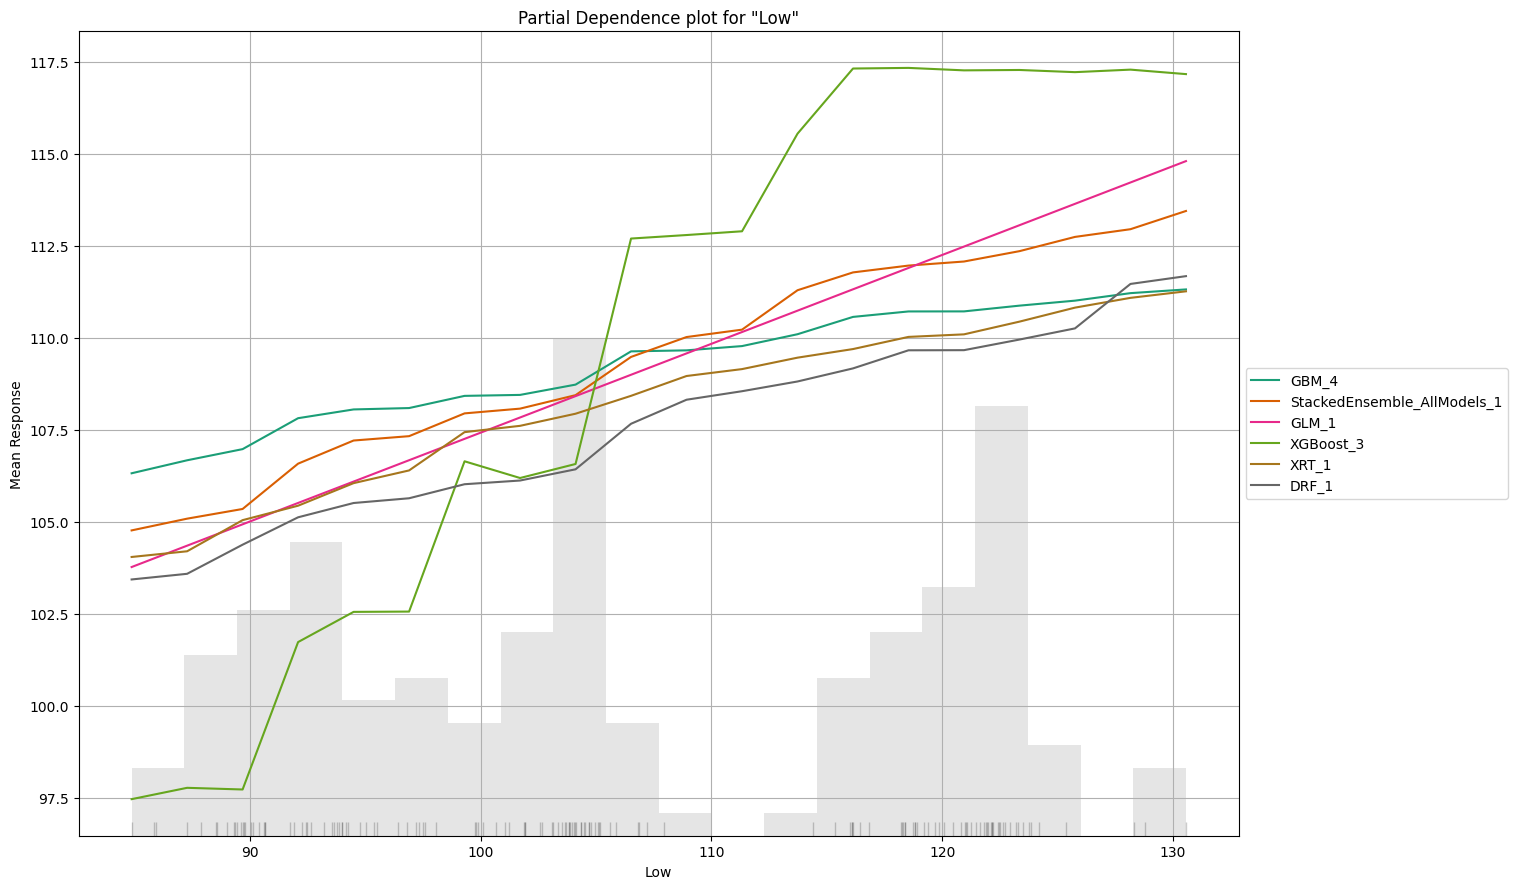

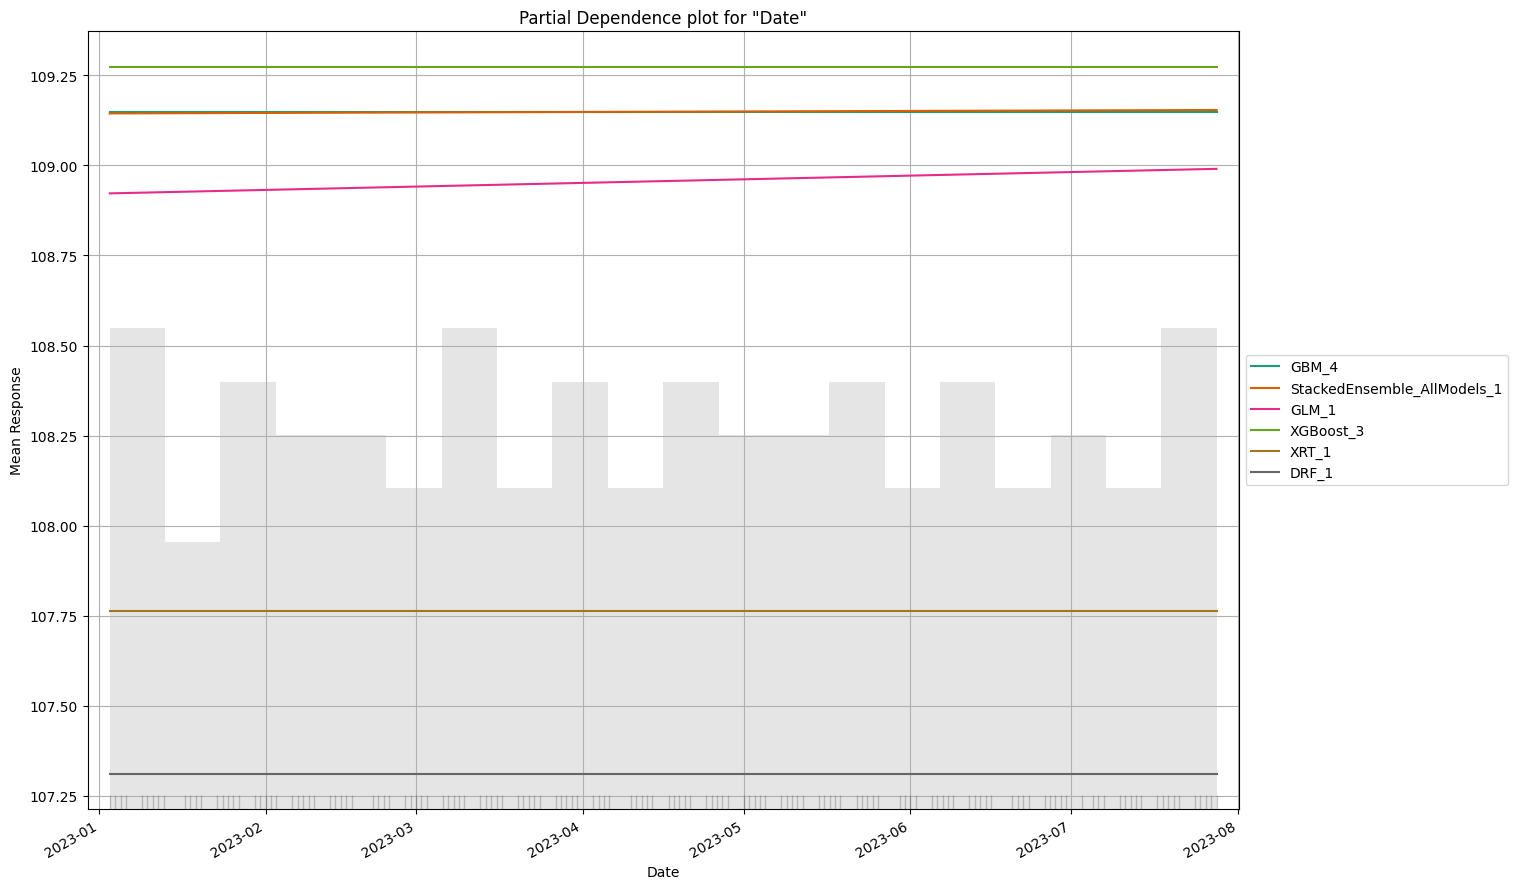

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

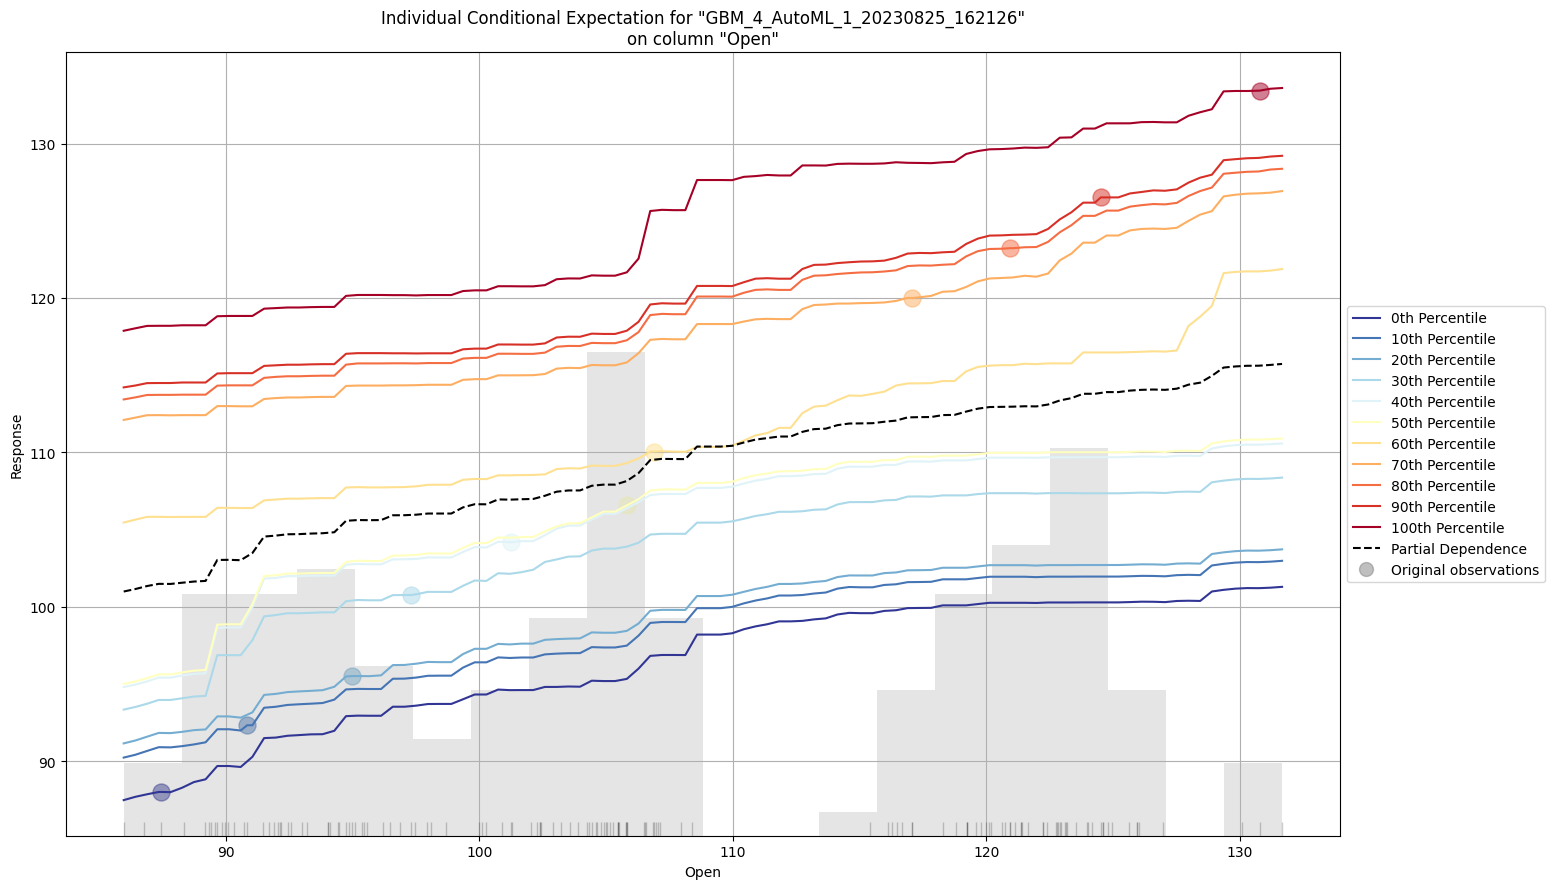

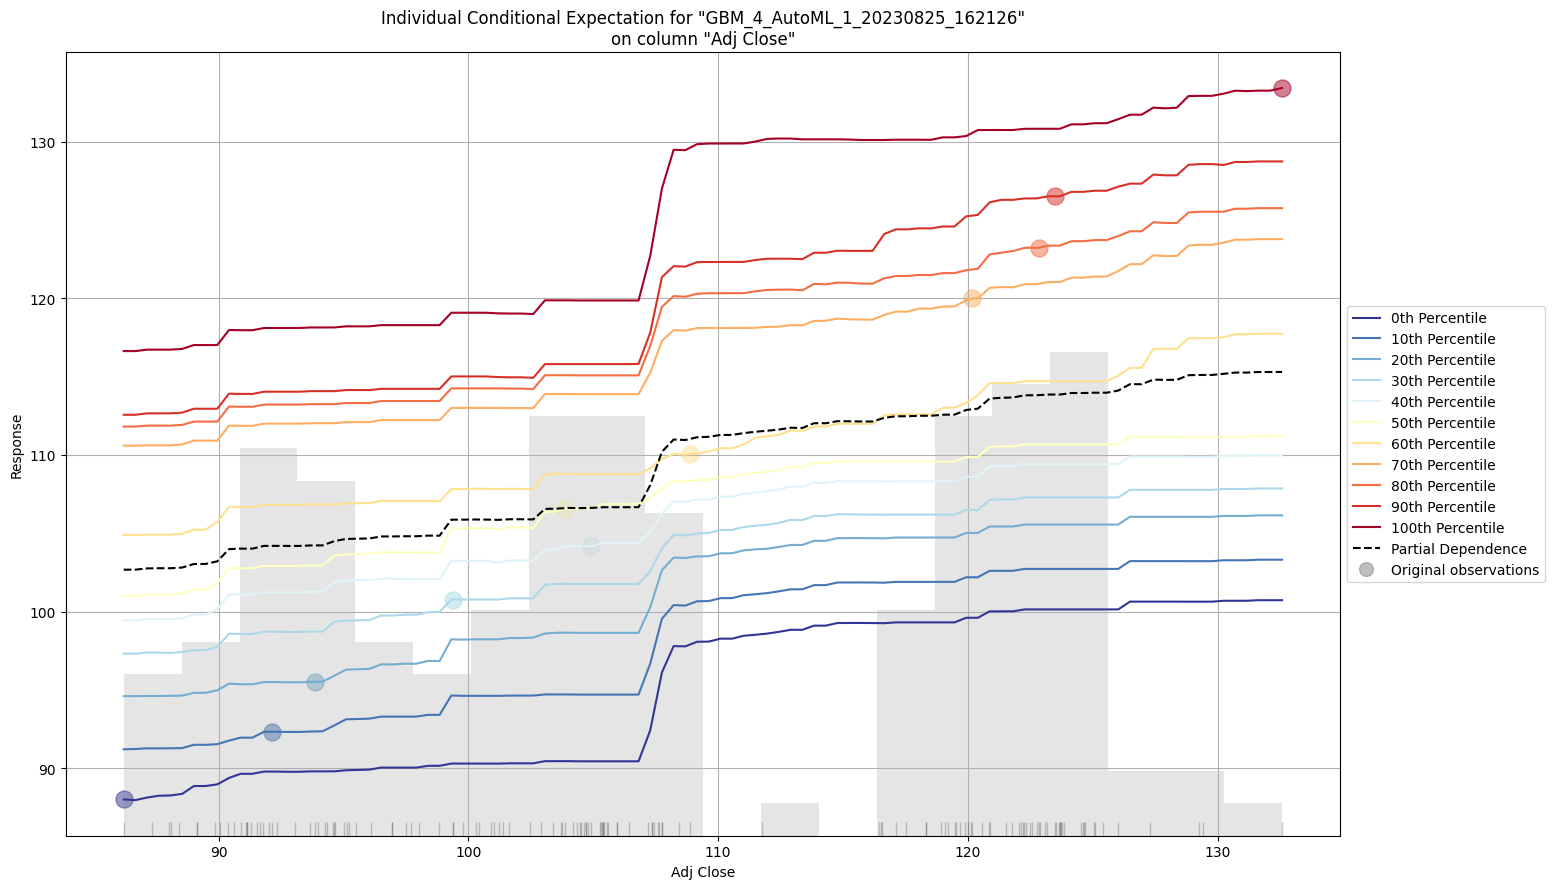

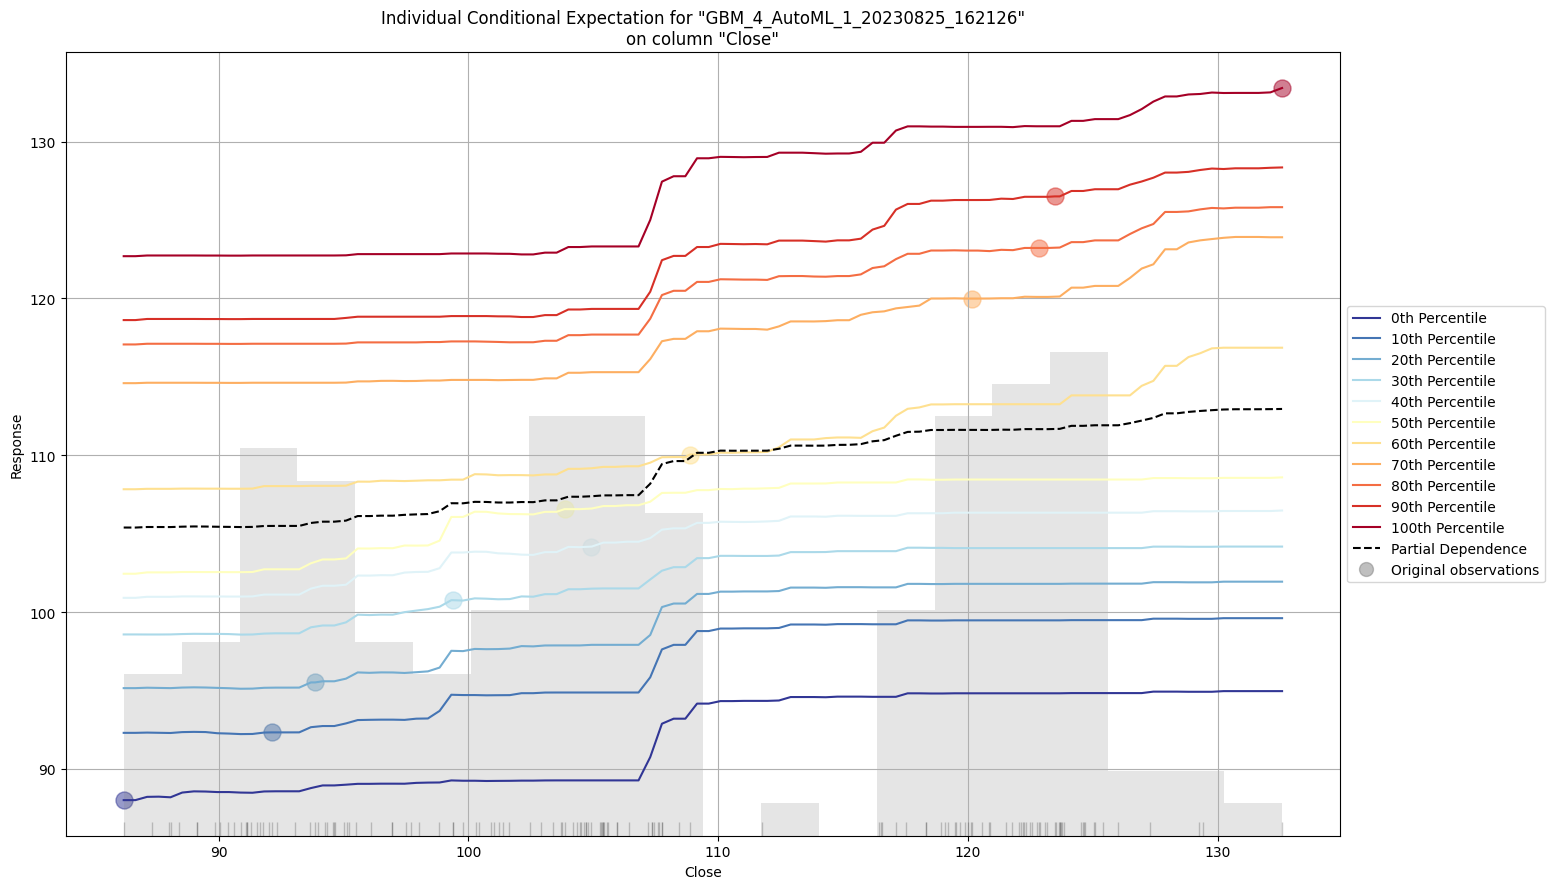

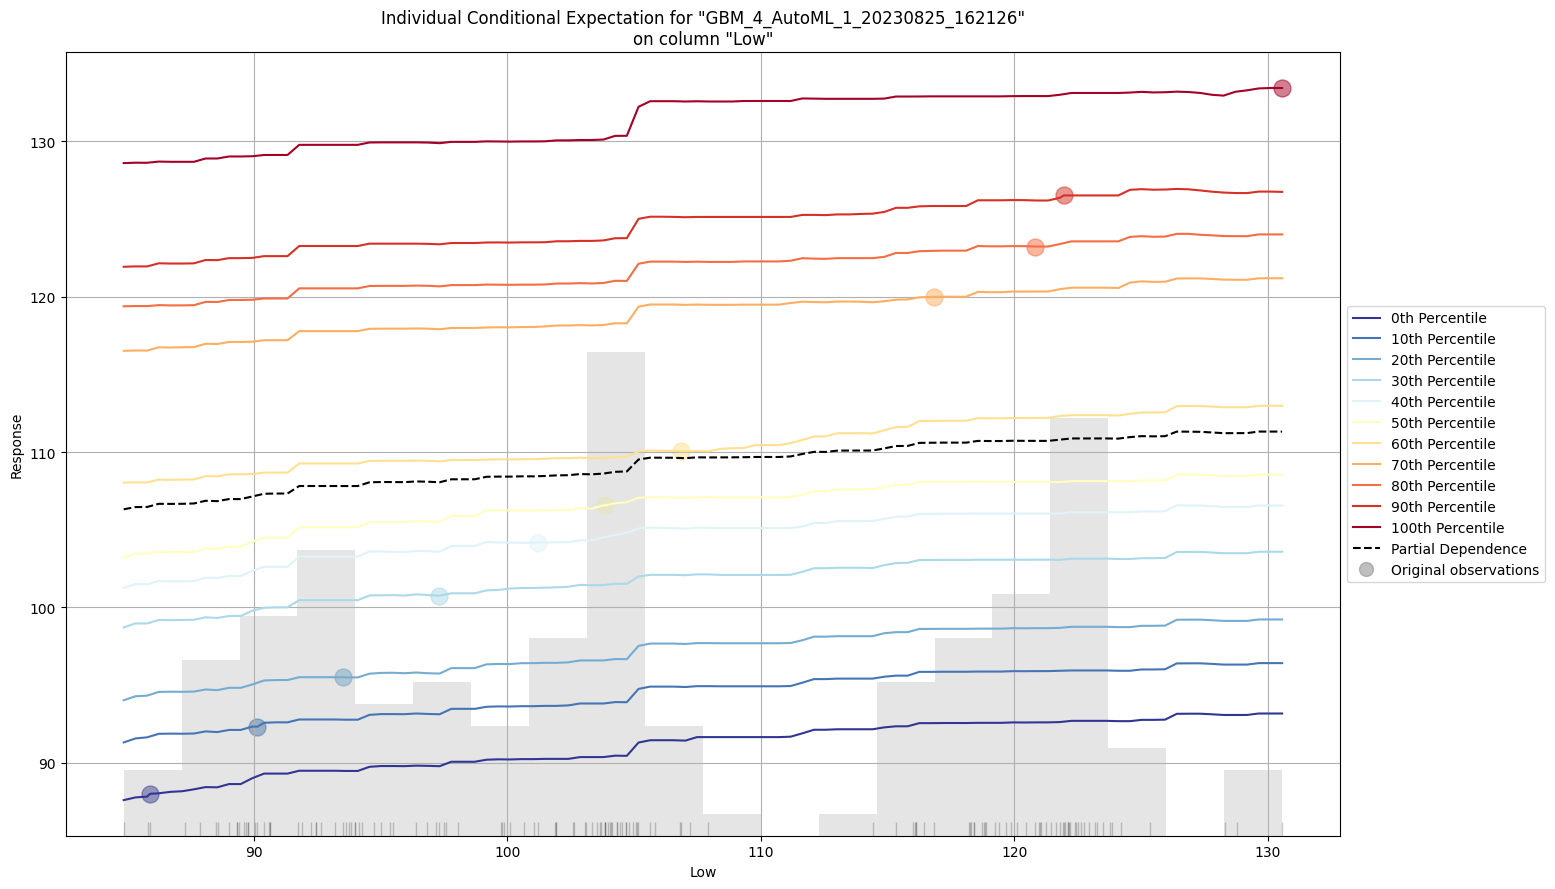

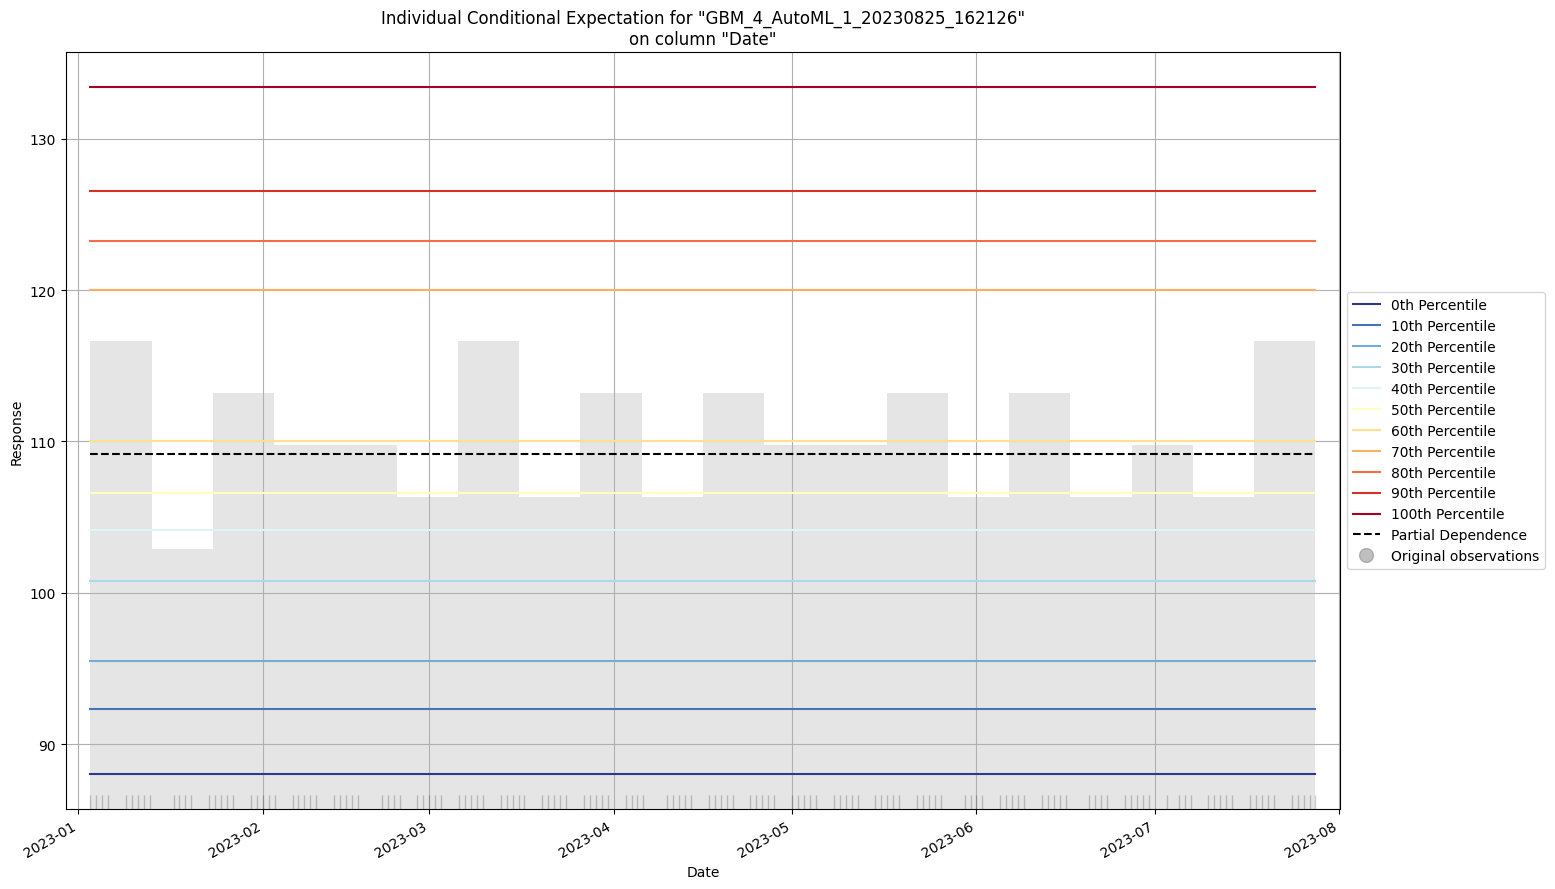

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_162126,0.75745,0.573731,0.597367,0.0070342,0.573731,2632,0.298532,StackedEnsemble
GBM_4_AutoML_1_20230825_162126,0.76652,0.587553,0.614789,0.00701414,0.587553,877,0.127209,GBM
GLM_1_AutoML_1_20230825_162126,0.768146,0.590048,0.561359,0.00688823,0.590048,64,0.003614,GLM
StackedEnsemble_AllModels_1_AutoML_1_20230825_162126,0.769565,0.592231,0.601954,0.00706682,0.592231,3743,0.842454,StackedEnsemble
GBM_3_AutoML_1_20230825_162126,0.777367,0.6043,0.598333,0.00710058,0.6043,863,0.048478,GBM
GBM_2_AutoML_1_20230825_162126,0.81171,0.658873,0.612382,0.00738725,0.658873,710,0.090539,GBM
GBM_1_AutoML_1_20230825_162126,1.14345,1.30749,0.856048,0.0102693,1.30749,2596,0.174493,GBM
XGBoost_3_AutoML_1_20230825_162126,1.39379,1.94264,1.05118,0.0129978,1.94264,1161,0.025505,XGBoost
XGBoost_1_AutoML_1_20230825_162126,1.47564,2.17751,1.11825,0.0127326,2.17751,12380,0.119894,XGBoost
XGBoost_2_AutoML_1_20230825_162126,1.58628,2.51629,1.25987,0.01414,2.51629,4839,0.032107,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
# explain the model
exm = aml.explain(test_df)
exm

In [ ]:
# import the necessary libraries for Gaussian process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel, DotProduct, Matern,RationalQuadratic,WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss,mean_squared_error,r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score as ras
from sklearn.model_selection import learning_curve

In [ ]:
# import the input files as train and test datasets seperately
train_df =pd.read_csv('Google_Stock_Train (2010-2022).csv')
test_df = pd.read_csv('Google_Stock_Test (2023).csv')

In [ ]:
train_df.Date = pd.to_datetime(train_df.Date)
train_df = train_df.assign(
    month = train_df.Date.dt.month,
    week =  train_df.Date.dt.weekofyear,
    year = train_df.Date.dt.year
)
train_df.shape
test_df.Date = pd.to_datetime(test_df.Date)
test_df = test_df.assign(
    month = test_df.Date.dt.month,
    week =  test_df.Date.dt.weekofyear,
    year = test_df.Date.dt.year
)
test_df.shape


<ipython-input-29-942f9c01255d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week =  train_df.Date.dt.weekofyear,
<ipython-input-29-942f9c01255d>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week =  test_df.Date.dt.weekofyear,


(143, 10)

In [ ]:

train_df = train_df.drop('Date',axis = 1)
test_df = test_df.drop('Date',axis = 1)

In [ ]:
predictors = train_df.columns[:2].tolist() + train_df.columns[3:].tolist()
response = 'High'

In [ ]:
kernel = 1.0* RationalQuadratic(length_scale=1.0, alpha=1.0) + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b',
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=20)

# Train the Gaussian Process Regressor
gp.fit(train_df[predictors], train_df[response])

# Make predictions on the test set
predictions = gp.predict(test_df[predictors])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_df[response], predictions)
print(f"Mean Squared Error: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Mean Squared Error: 2596.4963945076315


In [ ]:

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = r2_score(test_df[response], predictions)

# Print the calculated metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2596.4963945076315
Root Mean Squared Error: 50.95582787579485
R2 Score: -14.961655757542339
